### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [2]:
import pandas as pd

import numpy as np

import statsmodels.api as sms

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 50)

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 USD
- PTRATIO:  pupil-teacher ratio by town
- B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT:    % lower status of the population
- MEDV:     Median value of owner-occupied homes in $1000's

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

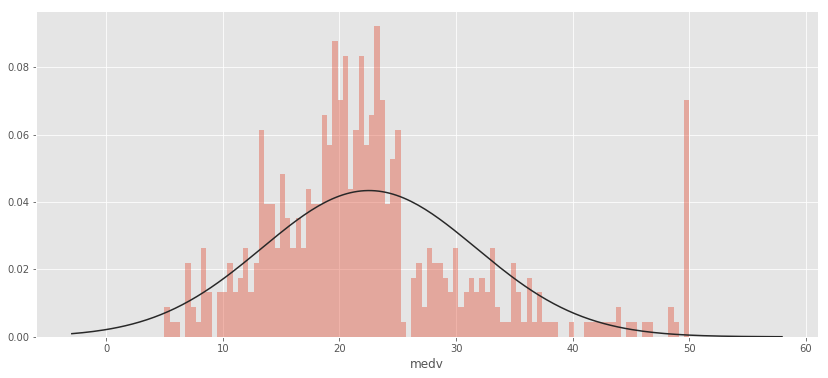

In [8]:
from scipy.stats import norm
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df.medv, bins=100, kde=False, fit=norm)

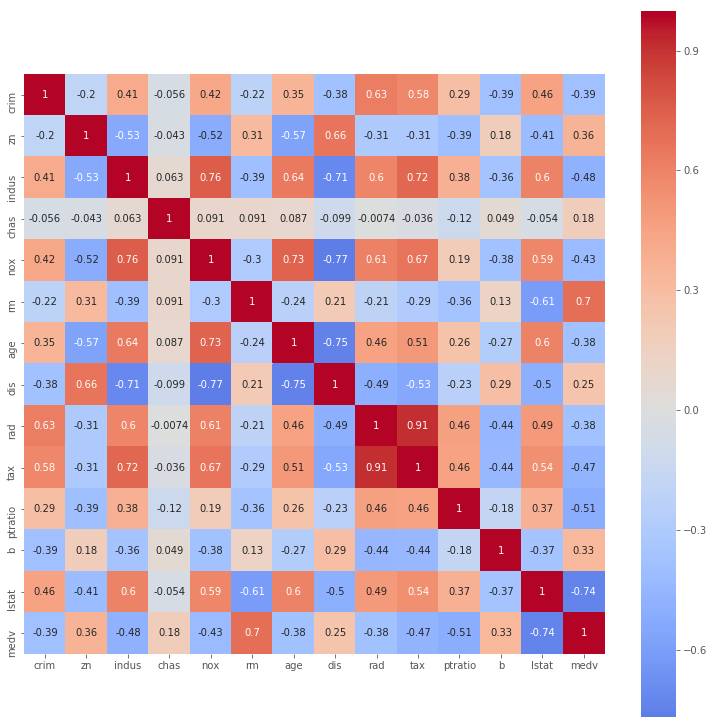

In [9]:
corr = df.corr()
f, ax = plt.subplots(figsize = (13,13))
sns.heatmap(data = corr, center = 0, cmap="coolwarm", annot=True, square=True)

In [11]:
abs(df.corr() >0.8)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,True,False,False,False,False,False,False,False,False,False,False,False,False,False
zn,False,True,False,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,True,False,False,False,False,False,False,False,False,False,False,False
chas,False,False,False,True,False,False,False,False,False,False,False,False,False,False
nox,False,False,False,False,True,False,False,False,False,False,False,False,False,False
rm,False,False,False,False,False,True,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,True,False,False,False,False,False,False,False
dis,False,False,False,False,False,False,False,True,False,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,True,True,False,False,False,False
tax,False,False,False,False,False,False,False,False,True,True,False,False,False,False


/Users/lennartjunge/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


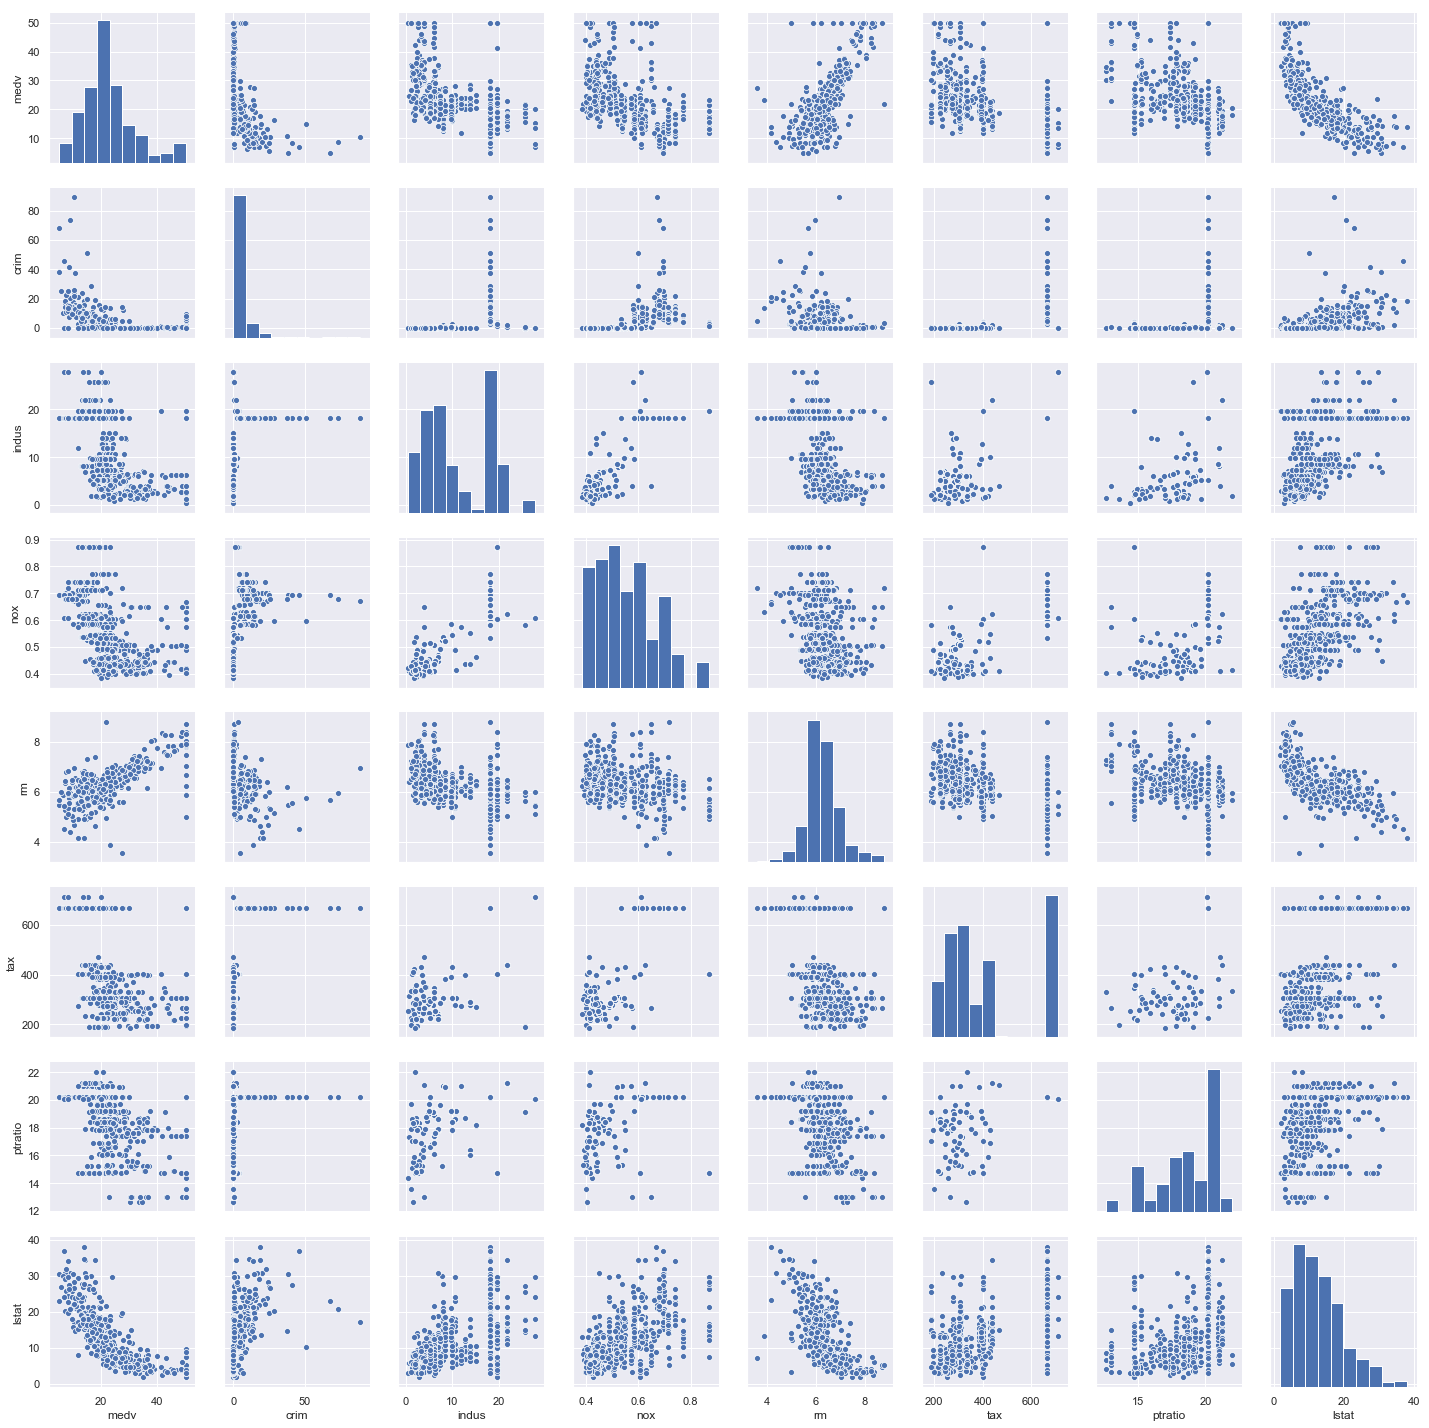

In [27]:
sns.set()
cols = ['medv', 'crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat']
sns.pairplot(df[cols], size = 2.5)
plt.show()

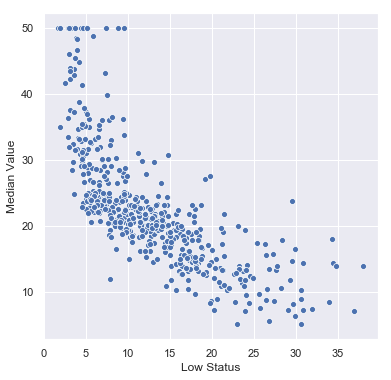

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x="lstat", y="medv", data=df)

plt.xlabel("Low Status")
plt.ylabel("Median Value")
plt.show()

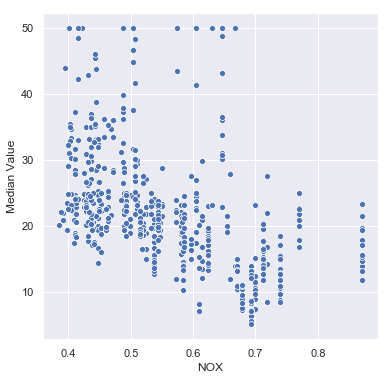

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x="nox", y="medv", data=df)

plt.xlabel("NOX")
plt.ylabel("Median Value")
plt.show()

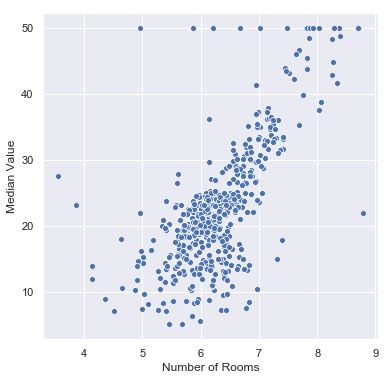

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x="rm", y="medv", data=df)

plt.xlabel("Number of Rooms")
plt.ylabel("Median Value")
plt.show()

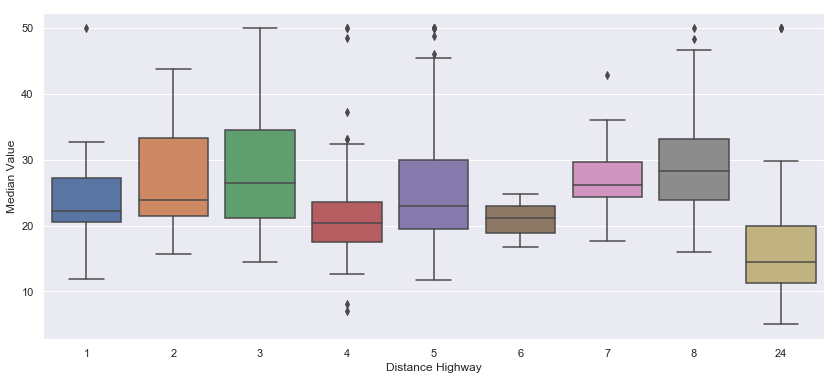

In [18]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='rad', y='medv', data=df)

plt.xlabel("Distance Highway")
plt.ylabel("Median Value")
plt.show()

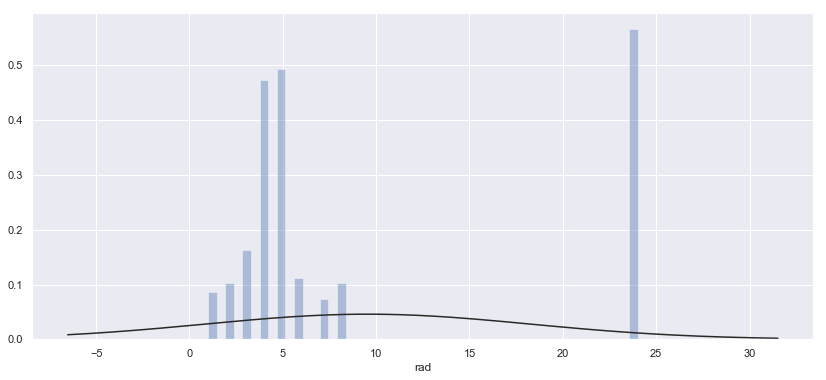

In [22]:
from scipy.stats import norm
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(df.rad, bins=50, kde=False, fit=norm)

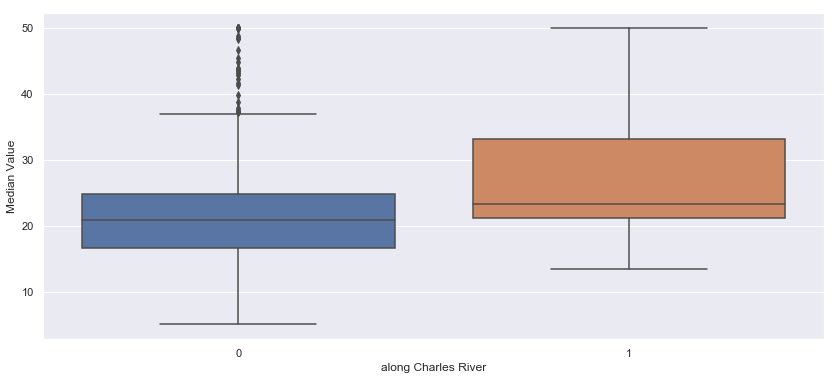

In [14]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='chas', y='medv', data=df)

plt.xlabel("along Charles River")
plt.ylabel("Median Value")
plt.show()

In [31]:
# Importing the dataset
test_set = ['medv', 'rm', 'nox', 'lstat']

X = df.loc[:, test_set[1:]].values
y = df.loc[:, test_set[0]].values

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
reg = LinearRegression().fit(df[['rm', 'nox', 'lstat']],df[['medv']])
reg.predict(df[['rm', 'nox', 'lstat']])

array([[28.83092974],
       [25.57795954],
       [32.67585641],
       [32.41684438],
       [31.69169263],
       [28.09228978],
       [21.33132926],
       [17.96548485],
       [ 8.47859824],
       [18.38149582],
       [18.20623254],
       [20.79273901],
       [18.65799727],
       [23.58005725],
       [23.08757913],
       [22.85995441],
       [24.55475106],
       [19.79750906],
       [18.91728966],
       [20.56136429],
       [13.6900151 ],
       [20.19261793],
       [18.05375337],
       [15.64530905],
       [18.44401233],
       [16.64779915],
       [18.80329889],
       [18.46388541],
       [23.55007948],
       [24.97809514],
       [13.43864827],
       [21.23299514],
       [11.47021071],
       [16.02438639],
       [16.80897212],
       [22.68556119],
       [21.13654399],
       [22.82706008],
       [22.57436929],
       [29.54753511],
       [33.20340859],
       [30.08348472],
       [26.39956805],
       [25.5994995 ],
       [23.55757203],
       [21

In [40]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print('Train MSE:  ' +str(mean_squared_error(y_train, y_pred_train)))
print('Test MSE:  ' +str(mean_squared_error(y_test, y_pred_test)))
print('Train R2:  ' +str(r2_score(y_train, y_pred_train)))
print('Test R2:  ' +str(r2_score(y_test, y_pred_test)))

Train MSE:  29.51704601483033
Test MSE:  32.73274163706149
Train R2:  0.6517759047210815
Test R2:  0.6068871142250484


In [49]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

y_pred_poly_train = pol_reg.predict(X_train_poly)
y_pred_poly_test = pol_reg.predict(X_test_poly)

print('Train MSE:  ' +str(mean_squared_error(y_train, y_pred_poly_train)))
print('Test MSE:  ' +str(mean_squared_error(y_test, y_pred_poly_test)))
print('Train R2:  ' +str(r2_score(y_train, y_pred_poly_train)))
print('Test R2:  ' +str(r2_score(y_test, y_pred_poly_test)))

Train MSE:  16.757037831307205
Test MSE:  21.492433815875994
Train R2:  0.8023106941179086
Test R2:  0.7418806901857593


In [59]:
MSE_train = []
MSE_test = []
poly_max=6
for i in range(1,poly_max):
    poly_reg = PolynomialFeatures(degree=i)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train_poly, y_train)

    y_pred_poly_train = pol_reg.predict(X_train_poly)
    y_pred_poly_test = pol_reg.predict(X_test_poly)
    
    MSE_train.append(mean_squared_error(y_train, y_pred_poly_train))
    MSE_test.append(mean_squared_error(y_test, y_pred_poly_test))
    
MSE_train

[29.469895635107388,
 16.757037831307205,
 12.449232701579563,
 10.427176643507796,
 10.349717053769881]

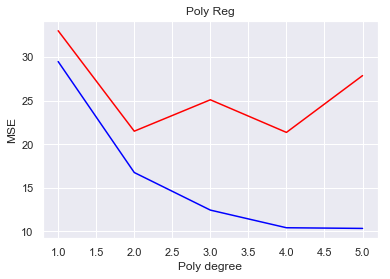

In [60]:
poly_degree = list(range(1,poly_max))

#plt.scatter(X, y, color='red')
plt.plot(poly_degree, MSE_train, color='blue')
plt.plot(poly_degree, MSE_test, color='red')
plt.title('Poly Reg')
plt.xlabel('Poly degree')
plt.ylabel('MSE')
plt.show()

In [56]:
MSE_test

[33.00326674441796,
 21.492433815875994,
 25.090809242960677,
 21.353362107956496,
 27.860043445759676,
 128.79409765968504,
 1428.779070691027,
 1944.5008346297684,
 19421.46364991437,
 2822991.5152743594]